## 1 Задача 
ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков

## 2 Задание
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('water.csv')

In [5]:
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


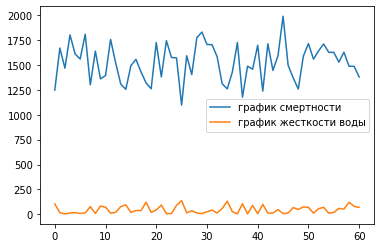

In [48]:
#Построить точечный график
plt.plot(data['mortality'], label= 'график смертности')
plt.plot(data['hardness'], label= 'график жесткости воды')
plt.legend()

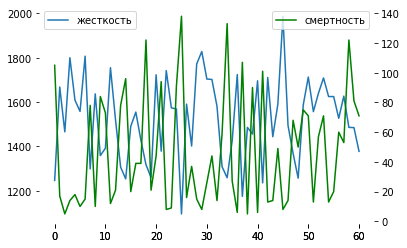

In [93]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1", frame_on=False)
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.plot(data['mortality'])
ax2.plot(data['hardness'], color='g')
ax2.yaxis.tick_right()
ax.legend(['жесткость'])
ax2.legend(['смертность'])

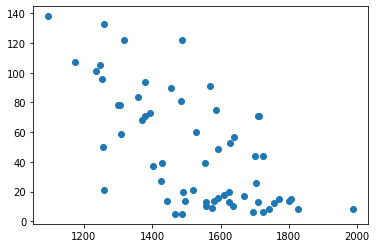

In [16]:
plt.scatter(data['mortality'], data['hardness'])

видна зависимость: чем выше жесткость воды, тем ниже уровень смертности

In [68]:
# Рассчитать коэффициенты корреляции Пирсона 
data[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [69]:
#и Спирмена
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [70]:
#Построить модель линейной регрессии
from sklearn.linear_model import LinearRegression

In [81]:
X = data[['mortality']].values
Y = data['hardness'].values
model = LinearRegression()
model.fit(X, Y)
print(model.score(X, Y))
print(model.coef_)
print(model.intercept_)


0.42882671931249744
[-0.13292453]
249.77692756960678


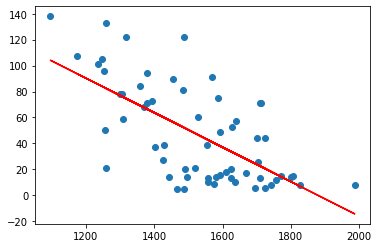

In [82]:
plt.scatter(data['mortality'], data['hardness'])
plt.plot(data['mortality'], model.predict(data[['mortality']]), c='r')

In [94]:
#Рассчитать коэффициент детерминации
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [98]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())
print('-------------')
print('Коэффициент детерминации:')
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           1.03e-08
Time:                        23:41:22   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

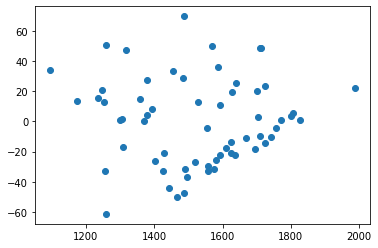

In [100]:
#Вывести график остатков
plt.scatter(X[:, 1], results.resid)

(array([ 2.,  3., 11., 10.,  9.,  9.,  8.,  3.,  5.,  1.]),
 array([-61.29201633, -48.18792189, -35.08382745, -21.97973301,
         -8.87563857,   4.22845587,  17.33255031,  30.43664475,
         43.54073919,  56.64483363,  69.74892807]),
 <a list of 10 Patch objects>)

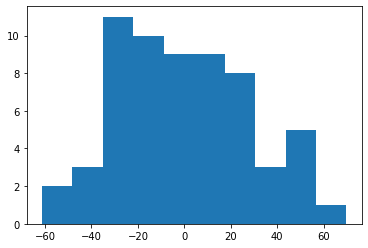

In [101]:
plt.hist(results.resid)

## 2 Задание

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

**Северные города**

In [112]:
data_north = data.loc[data['location']=='North']
data_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


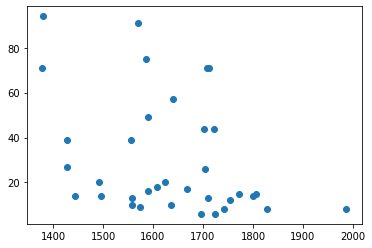

In [113]:
plt.scatter(data_north['mortality'], data_north['hardness'])

Зависимость не такая явная

In [114]:
# Рассчитать коэффициенты корреляции Пирсона 
data_north[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [115]:
#и Спирмена
data_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [116]:
#Построить модель линейной регрессии
X = data_north[['mortality']].values
Y = data_north['hardness'].values
model = LinearRegression()
model.fit(X, Y)
print(model.score(X, Y))
print(model.coef_)
print(model.intercept_)


0.13586436642071698
[-0.07034712]
145.31906222237836


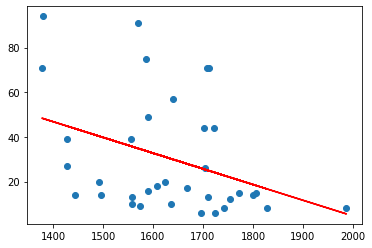

In [117]:
plt.scatter(data_north['mortality'], data_north['hardness'])
plt.plot(data_north['mortality'], model.predict(data_north[['mortality']]), c='r')

In [119]:
#Рассчитать коэффициент детерминации
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
#print(results.summary())
#print('-------------')
print('Коэффициент детерминации:')
print('R2: ', results.rsquared)

Коэффициент детерминации:
R2:  0.13586436642071742


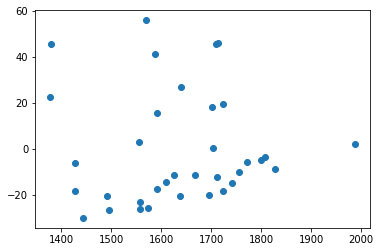

In [122]:
#Вывести график остатков
plt.scatter(X[:, 1], results.resid)

(array([5., 8., 8., 4., 0., 3., 2., 0., 4., 1.]),
 array([-29.73781476, -21.15847571, -12.57913666,  -3.9997976 ,
          4.57954145,  13.1588805 ,  21.73821956,  30.31755861,
         38.89689766,  47.47623672,  56.05557577]),
 <a list of 10 Patch objects>)

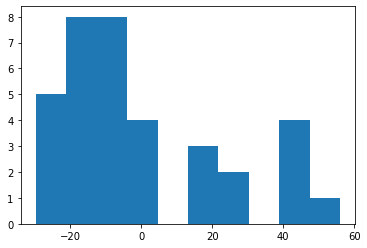

In [123]:
plt.hist(results.resid)

**Южные города**

In [124]:
data_south = data.loc[data['location']=='South']
data_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


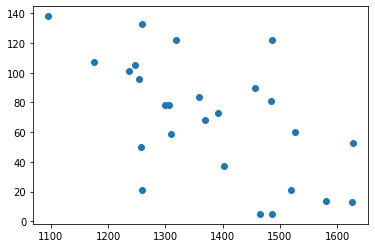

In [125]:
plt.scatter(data_south['mortality'], data_south['hardness'])

Зависимость есть, но опять же, не такая явная, как в общем списке городов

In [126]:
# Рассчитать коэффициенты корреляции Пирсона 
data_south[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [127]:
#и Спирмена
data_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [130]:
#Построить модель линейной регрессии
X = data_south[['mortality']].values
Y = data_south['hardness'].values
model = LinearRegression()
model.fit(X, Y)
print(model.score(X, Y))
print(model.coef_)
print(model.intercept_)


0.3625885624364601
[-0.17326199]
308.31767129925424


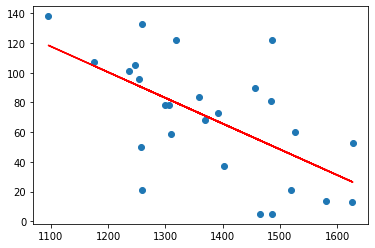

In [131]:
plt.scatter(data_south['mortality'], data_south['hardness'])
plt.plot(data_south['mortality'], model.predict(data_south[['mortality']]), c='r')

In [132]:
#Рассчитать коэффициент детерминации
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
#print(results.summary())
#print('-------------')
print('Коэффициент детерминации:')
print('R2: ', results.rsquared)

Коэффициент детерминации:
R2:  0.3625885624364602


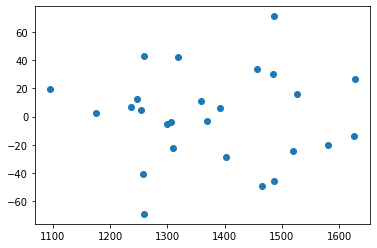

In [133]:
#Вывести график остатков
plt.scatter(X[:, 1], results.resid)

(array([1., 2., 2., 4., 3., 6., 3., 4., 0., 1.]),
 array([-69.00756398, -54.99184301, -40.97612203, -26.96040106,
        -12.94468009,   1.07104088,  15.08676186,  29.10248283,
         43.1182038 ,  57.13392477,  71.14964575]),
 <a list of 10 Patch objects>)

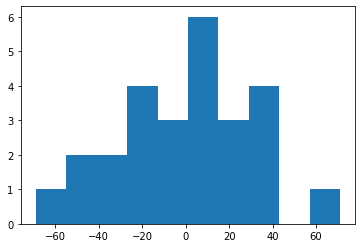

In [134]:
plt.hist(results.resid)

Вывод: взаимосвязь четко прослеживается у общего списка регионов, однако для северного региона взаимосвязь между жесткостью вды и смертностью менее характерна